## Credit Card Fraud Detection: Comparing Different Models

This Jupyter notebook presents a simple machine learning project where different types of classification models are trained to predict credit card fraud. The performances of the models are then compared and visualized.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('creditcard.csv')

### Preprocess Data:

In [16]:
X = data.drop(['Class'], axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train and Evaluate Random Forest Classifier:

In [17]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf.fit(X_train, y_train)

rf_predictions = clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

### Train and Evaluate Logistic Regression Model:

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)

### Train and Evaluate SVM Model:

In [19]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)

### Train and Evaluate Neural Network:

In [21]:
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=5, batch_size=32)

# nn_predictions = nn_model.predict_classes(X_test)
nn_predictions = nn_model.predict(X_test)
nn_predictions = [1 if pred > 0.5 else 0 for pred in nn_predictions]


nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1_score = f1_score(y_test, nn_predictions)

Epoch 1/5
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0138 - accuracy: 0.9968
Epoch 2/5
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/5
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 4/5
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 5/5
1781/1781 [==============================] - 2s 881us/step


### Visualize Model Performances

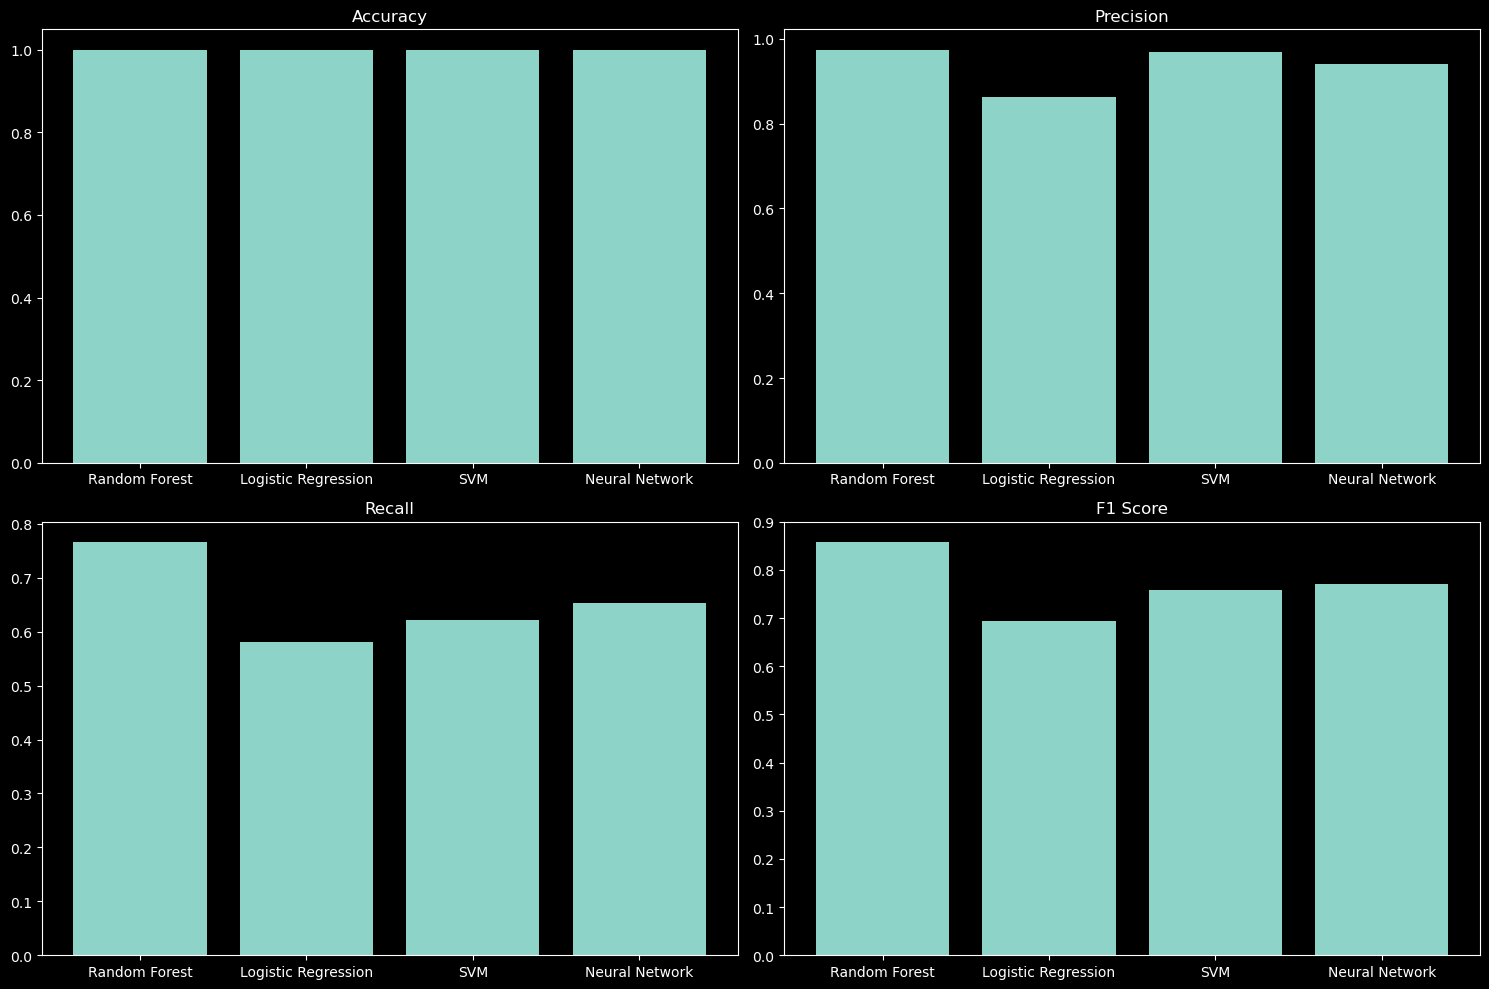

In [27]:
# Model names
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Neural Network']

# Metric values
accuracy_values = [rf_accuracy, lr_accuracy, svm_accuracy, nn_accuracy]
precision_values = [rf_precision, lr_precision, svm_precision, nn_precision]
recall_values = [rf_recall, lr_recall, svm_recall, nn_recall]
f1_score_values = [rf_f1_score, lr_f1_score, svm_f1_score, nn_f1_score]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot accuracy
axs[0, 0].bar(models, accuracy_values)
axs[0, 0].set_title('Accuracy')

# Plot precision
axs[0, 1].bar(models, precision_values)
axs[0, 1].set_title('Precision')

# Plot recall
axs[1, 0].bar(models, recall_values)
axs[1, 0].set_title('Recall')

# Plot F1 score
axs[1, 1].bar(models, f1_score_values)
axs[1, 1].set_title('F1 Score')

# Display the plot
plt.tight_layout()
plt.show()

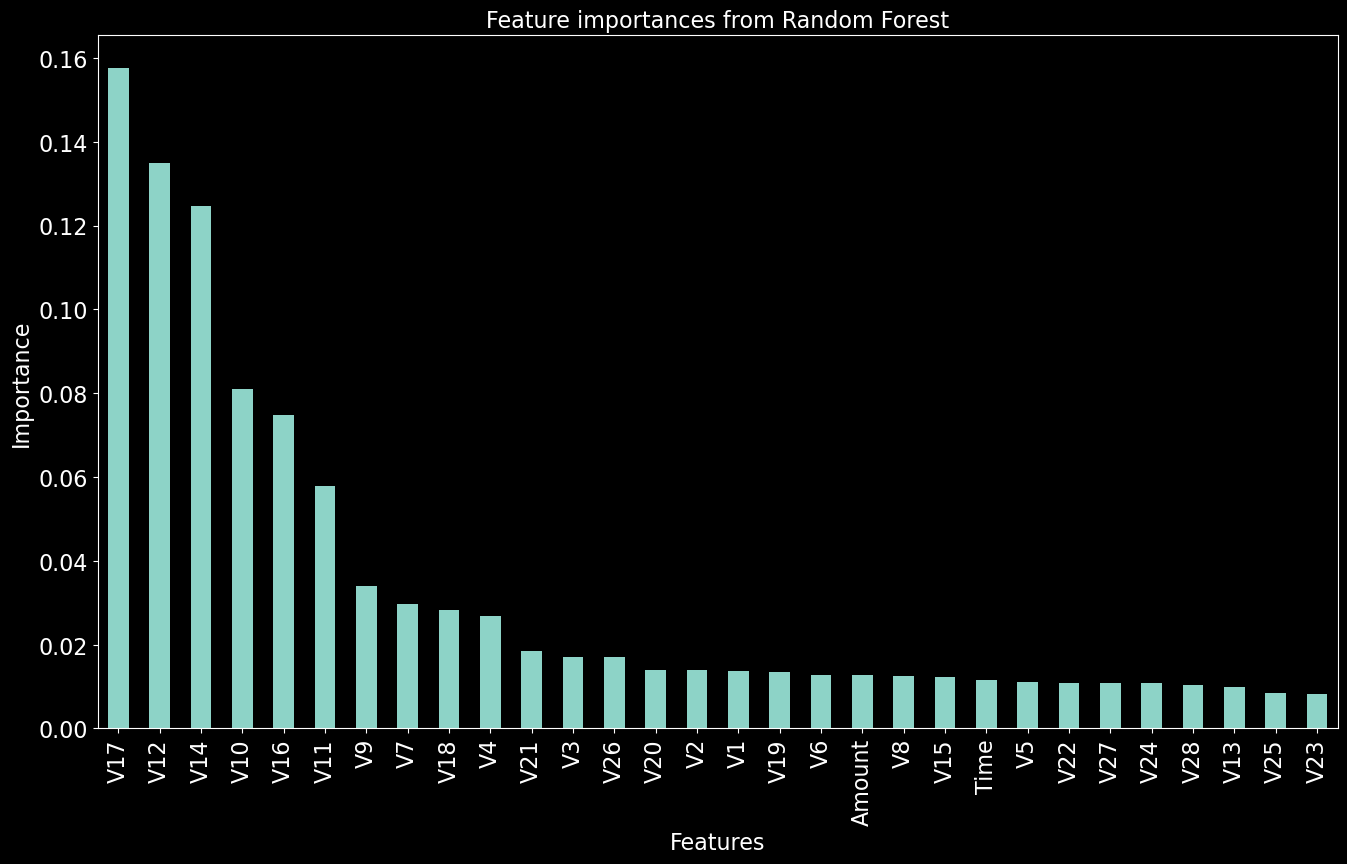

In [32]:
# Get feature importances
importances = clf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, data.columns[:-1])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(16, 9))
f_importances.plot(kind='bar', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.title('Feature importances from Random Forest', fontsize=16)
plt.show()


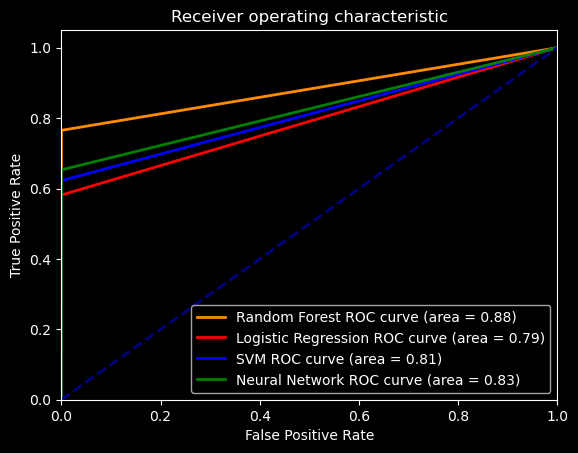

In [33]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve from y_test and prediction results
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_predictions)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_predictions)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_predictions)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, nn_predictions)

roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure()

plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='blue',
         lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, color='green',
         lw=2, label='Neural Network ROC curve (area = %0.2f)' % roc_auc_nn)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()